In [3]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

# Ejercicios 


1.  Encontrar la formulación  variacional de 

$$\begin{cases}-\nabla\cdot(\alpha\nabla u(x))=f(x), &\text{ con }x\in\Omega\\
u(x)=U_a,&\text{ con }x\in\Gamma_{D_a}\\
u(x)=U_b,&\text{ con }x\in\Gamma_{D_b}\\
\frac{\partial u}{\partial n}=0,&\text{ con }x\in\Gamma_{N}\end{cases}$$
 

**R/** Dado que se tienen condiciones de Dirichlet no homogeneas, defina:
 $$V \subseteq H^1(\Omega) = \{ v : || v || < \infty , ||\nabla v|| < \infty , v|_{\Gamma_{D_a}}=U_a, v|_{\Gamma_{D_b}}=U_b \}$$

Sea $u, v \in V$, integrando sobre $\Omega$:
$$- \int_{\Omega} v \Big( \nabla\cdot(\alpha\nabla u(x)) \Big) \, dx = \int_{\Omega} fv \, dx$$
Usando teorema de Green se obtiene que:
$$- \int_{\Omega} v \Big( \nabla\cdot(\alpha\nabla u(x)) \Big) \, dx = \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \alpha \frac{\partial u}{\partial \eta} v \, dS$$
Pero:
$$ - \int_{\partial \Omega} \alpha \frac{\partial u}{\partial \eta} v \, dS = - \Big( \int_{\Gamma_{D_a}} \alpha \frac{\partial u}{\partial \eta} v \, dS + \int_{\Gamma_{D_b}} \alpha \frac{\partial u}{\partial \eta} v \, dS + \int_{\Gamma_{N}} \alpha \frac{\partial u}{\partial \eta} v \, dS \Big) $$
Dado que $\frac{\partial u}{\partial \eta}=0, \text{ con }x\in\Gamma_{N}$ el ultimo termino se anula. Ademas, $u(x)=U_a$ en $\Gamma_{D_a}$ y $u(x)=U_b$ en $\Gamma_{D_b}$, entonces:
$$ - \int_{\partial \Omega} \alpha \frac{\partial u}{\partial \eta} v \, dS = - \int_{\Gamma_{D_a}} \alpha \frac{\partial U_a}{\partial \eta} v \, dS - \int_{\Gamma_{D_b}} \alpha \frac{\partial U_b}{\partial \eta} v \, dS  $$ 
Finalmente, se tiene que la forma variacional esta dada por:
$$ \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx - \int_{\Gamma_{D_a}} \alpha \frac{\partial U_a}{\partial \eta} v \, dS - \int_{\Gamma_{D_b}} \alpha \frac{\partial U_b}{\partial \eta} v \, dS = \int_{\Omega} f v \, dx $$
$$ \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx = \int_{\Gamma_{D_a}} \alpha \frac{\partial U_a}{\partial \eta} v \, dS + \int_{\Gamma_{D_b}} \alpha \frac{\partial U_b}{\partial \eta} v \, dS + \int_{\Omega} f v \, dx $$

2. Encontrar la formulación  variacional de
$$\begin{cases}-\nabla\cdot(\alpha(u)\nabla u(x))=f(x), &\text{ con }x\in\Omega\\
u(x)=g,&\text{ con }x\in\partial\Omega\end{cases}$$

**R/** Defina
 $$V \subseteq H^1(\Omega) = \{ v : || v || < \infty , ||\nabla v|| < \infty , v|_{\partial \Omega}= g \}$$
 y
 $$ \hat{V} \subseteq H^1_0(\Omega) = \{ v : || v || < \infty , ||\nabla v|| < \infty , v|_{\partial \Omega}= 0 \} $$

Sea $u \in V$ y $v \in \hat{V}$, integrando sobre $\Omega$:
$$ - \int_{\Omega} \Big( \nabla \cdot (\alpha(u) \nabla u(x) \Big) v \, dx = \int_{\Omega} f v \, dx $$
Usando teorema de Green se obtiene que:
$$- \int_{\Omega} \Big( \nabla \cdot (\alpha(u) \nabla u(x) \Big) v \, dx = \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \alpha(u) \frac{\partial u}{\partial \eta} v \, dS$$
como $v$ se anula en $\partial \Omega$ el ultimo termino se anula, por lo tanto:
$$ \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx =  \int_{\Omega} f v \, dx$$

3. Sea $\Omega=[0,1]\times[0,1]$ y $f(x,y)=x^2+y^2$. Suponiendo que
$$\Gamma_{D_a}=\{(x,y)\in\Omega:x=0\},\quad \Gamma_{D_b}=\{(x,y)\in\Omega:x=1\},$$
$$\quad \Gamma_{N}=\{(x,y)\in\Omega:y=0\}\cup\{(x,y)\in\Omega:y=1\}$$
y $U_a=1$, $U_b=1$, $\alpha=5$, Implementar la aproximación del problema 1  en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

Como $U_a=1$, $U_b=1$ entonces $\frac{\partial U_a}{\partial \eta} = 0$ y $\frac{\partial U_b}{\partial \eta} = 0$ y la parte lineal del problema quedaria unicamente $L(v) = \int_{\Omega} f v \, dx$

In [4]:
# Create mesh
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)

# Define function space
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define functions for boundary conditions
u_a = Constant(1.0)
u_b = Constant(1.0)
g = Constant(0.0)

# Define boundary subdomains
def boundary_Da(x, on_boundary):
    return on_boundary and near(x[0], 0.0)

def boundary_Db(x, on_boundary):
    return on_boundary and near(x[0], 1.0)

bc_a = DirichletBC(V, u_a, boundary_Da)
bc_b = DirichletBC(V, u_b, boundary_Db)
bcs = [bc_a, bc_b]


Solving linear variational problem.


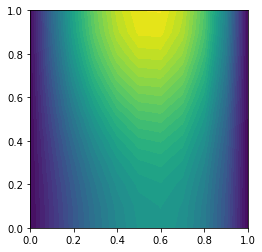

In [5]:
# Define variational problem
alpha = Constant(5.0)
u = TrialFunction(V)
v = TestFunction(V)
a = alpha*inner(grad(u), grad(v))*dx
f = Expression('x[0]*x[0] + x[1]*x[1]', degree=2)
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
plot(u)
#plot(mesh)

In [6]:
# Verification
Ve = FunctionSpace(mesh, 'Lagrange', 3)
u_e = interpolate(u_b, Ve)
error = (u-u_e)**2*dx
E = sqrt(assemble(error))
print('Error =', E)

Error = 0.01187343882718352


4. Sea $\Omega=[0,1]\times[0,1]$ y $f(x,y)=x^2+y^2$ y $\alpha(u)=u+3$. Implementar la aproximación del problema 2  en Fenics y resolverlo con el método de Galerkin. Graficar la solución. Tomemos $g(x,y) = x + y$

In [ ]:
# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define boundary condition
g = Constant(1.0)#Expression('x[0] + x[1]', degree=1)
bc = DirichletBC(V, g, 'on_boundary')

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# Define parameters
def alpha_(u):
    return u + 3
f = Expression('x[0]*x[0] + x[1]*x[1]', degree=2)

# Define variational problem
a = alpha_(u)*inner(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution
plot(u)

In [ ]:
# Verification
u_e = interpolate(g, V)
error = (u-u_e)**2*dx
E = sqrt(assemble(error))
print('Error =', E)

5. Sea le siguiente problema de valor inicial
$$\begin{cases} \frac{\partial u}{\partial t} = \frac{\partial^2}{\partial x^2} u,\quad &\text{ en } \Omega = [0,\pi]\times(0,T]\\\frac{\partial u}{\partial n}(0)=1,\\ u(\pi,t)=0,\\ u(x,0)=\sin(x),\end{cases}$$ 

 a. Encontrar la formula variacional del problema.

 b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

**R/** Note que podemos reescribir la EDP como:
$$ \frac{\partial u}{\partial t} = \Delta u + f$$
con $f = 0$. Sea $\Omega = [0,\pi]\times(0,T]$, defina los espacios:
$$ V = \{ v(\cdot, t) : ||v|| < \infty, ||\Delta v|| < \infty, v(\pi,t) = 0 \} \cap \{ v(x, \cdot) : ||v|| < \infty, ||v_{t}|| < \infty, v(x,0) = \sin x \}$$ 
y
$$ \hat{V} \subseteq H^1_0([0,\pi]) = \{ v : || v || < \infty , ||v_x|| < \infty , v(0,t) = v(\pi, t) = 0 \}$$
Para resolver esta EDP dependiente del tiempo, discretizaremos la derivada temporal mediante una aproximacion por diferencias finitas, generando formulas variacionales para cada estado del problema. Recordemos que:
$$ \frac{\partial u^k}{\partial t} \approx \frac{u^k - u^{k-1}}{dt} $$
Por lo tanto una discretizacion del problema seria la siguiente:
$$ \frac{u^k - u^{k-1}}{dt} = \Delta u^k + f^k $$
$$ u^k - u^{k-1} = dt (\Delta u^k + f^k) $$
Sea $u^k \in V$ y $v \in \hat{V}$, integrando sobre $\Omega$:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,d \Omega = dt \Big( \int_{\Omega} (\Delta u^k + f^k ) v \,d \Omega \Big)$$
$$ \int_{\Omega} (u^k - u^{k-1}) v \,d \Omega = dt \int_{\Omega} \Delta u^k v \,d \Omega + dt \int_{\Omega} f^k v \,d \Omega$$
Aplicando teorema de Green al primer termino del lado derecho obtenemos que:
$$ \int_{\Omega}  \Delta u^k v \,d \Omega = \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} v \, dS - \int_{\Omega} \nabla u^k \nabla v \,d \Omega $$
Como $v$ se anula en la frontera espacial (es decir, $v(0,t)=v(\pi,t)=0$), el primer termino es 0. Entonces:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,d \Omega = - dt \int_{\Omega} \nabla u^k \nabla v \,d \Omega + dt \int_{\Omega} f^k v \,d \Omega$$
$$ \int_{\Omega} u^k v \,d \Omega - \int_{\Omega} u^{k-1} v \,d \Omega = - dt \int_{\Omega} \nabla u^k \nabla v \,d \Omega + dt \int_{\Omega} f^k v \,d \Omega$$
$$ \int_{\Omega} u^k v \,d \Omega + dt \int_{\Omega} \nabla u^k \nabla v \,d \Omega = \int_{\Omega} u^{k-1} v \,d \Omega + dt \int_{\Omega} f^k v \,d \Omega $$
$$ \int_{\Omega} \Big( u^kv + dt(\nabla u^k \cdot \nabla v) \Big)\, d\Omega =  \int_{\Omega} (u^{k-1} + dt f) v \, d\Omega $$


Text(0.5, 1.0, 'initial condition, u(t=0, x) = sin(x)')

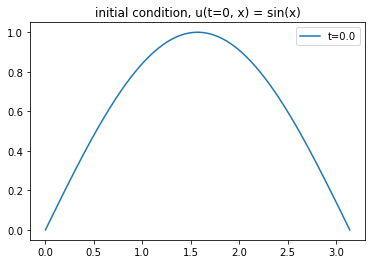

In [38]:
#Discretization
T = 5.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
mesh = IntervalMesh(200, 0, np.pi)
#mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_0 = Constant(0.0)
g = Constant(1.0) #Neumman condition
bc = DirichletBC(V, u_0, "near(x[0], 0)")

# Define the initial condition, u(t=0, x) = sin(x)
initial_condition = Expression("sin(x[0])", degree=1)
u_k_old = interpolate(initial_condition, V)
plt.figure()
plot(u_k_old, label="t=0.0")
plt.legend()
plt.title('initial condition, u(t=0, x) = sin(x)')

Solving linear variational problem.
time = 0.00: error = 0.287
Solving linear variational problem.
time = 0.10: error = 0.118
time = 0.20: error = 0.071
Solving linear variational problem.
Solving linear variational problem.
time = 0.30: error = 0.0578
time = 0.40: error = 0.0496
time = 0.50: error = 0.0425
time = 0.60: error = 0.0366
time = 0.70: error = 0.0316
Solving linear variational problem.
Solving linear variational problem.
time = 0.80: error = 0.0275
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
time = 0.90: error = 0.0241
Solving linear variational problem.
time = 1.00: error = 0.0212
Solving linear variational problem.
time = 1.10: error = 0.0189
Solving linear variational problem.
time = 1.20: error = 0.017
Solving linear variational problem.
time = 1.30: error = 0.0155
Solving linear variational problem.
time = 1.40: error = 0.0143
time = 1.50: error = 0.0133
Solving linear v

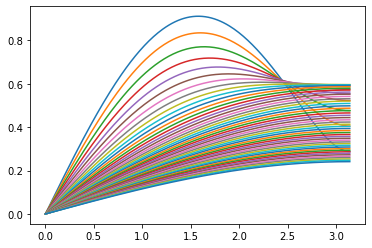

In [39]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
a = u*v*dx + dt*inner(nabla_grad(u), nabla_grad(v))*dx
L = (u_k_old + dt*f)*v*dx

# Time-stepping
u = Function(V)
t = 0

while t <= T:
    # Compute solution
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_k_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_k_old.assign(u)
    u.rename("u", "u")
    # Update current time
    t += dt
    u_k_old.t = t

6. Sea le siguiente problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\frac{\partial }{\partial x}\Big(x^2\frac{\partial u}{\partial x}\Big),\quad &\text{ en } [0,\pi]\times(0,T]\\u(0,t)=1,\\ u(1,t)=0,\\u(x,0)=\sin(x)\end{cases}$$

a. Encontrar la formula variacional del problema.

b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

7. Sea el problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\nabla^2 u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=1 + x^2 + \alpha y^2+ \beta t, &\text{ para }(x,y)\in \partial\Omega\\ u(x,y,0)=1 + x^2 + \alpha y^2\end{cases}$$
donde $\Omega =[0,1]\times[0,1]$, $\alpha = 3,\beta = 1.2$ y $f(x,y)=\beta- 2 - 2\alpha$.

a. Encontrar la formula variacional del problema.


b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

8. Sea el problema de valor inicial
$$\begin{cases}\frac{\partial u}{\partial t}=\nabla\cdot\Big(\alpha(u)\nabla(u) \Big) u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=u_D, &\text{ para }(x,y)\in \partial\Omega\\ u(x,y,0)=u_0\end{cases}$$


a. Encontrar la formula variacional del problema.

b. Escribir un pseudocódigo para resolver el problema.

9. Sea el problema de valor inicial
$$\begin{cases}\frac{\partial u}{\partial t}=\nabla\cdot\Big(\alpha(u)\nabla(u) \Big) u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=u_D, &\text{ para }(x,y)\in \Gamma_D\\
 \frac{\partial u}{\partial n}=u_N, &\text{ para }(x,y)\in \Gamma_N\\ u(x,y,0)=u_0\end{cases}$$


a. Encontrar la formula variacional del problema.

b. Escribir un pseudocódigo para resolver el problema.